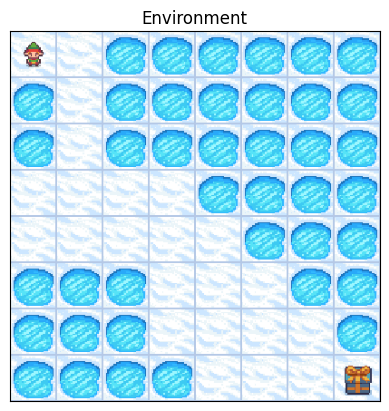

In [23]:
import sys
import matplotlib.pyplot as plt

sys.path.append("..")
from mango.environments import frozen_lake
import utils

params = dict(
    map_name="RANDOM", p=None, shape=(8, 8), seed=0, start_pos=[(0, 0)], goal_pos=[(-1, -1)]
)
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env, one_hot=True)
obs, info = env.reset()
utils.render(env)

In [16]:
from mango.mango import MangoEnv, Agent
from mango.policies.dqnet import DQNetTrainer, DQNetPolicy
from mango.neuralnetworks.networks import ConvEncoder


def make(env: MangoEnv, trainer_kwargs, net_kwargs) -> tuple[DQNetPolicy, DQNetTrainer]:
    net = ConvEncoder(in_channels=None, out_features=int(env.action_space.n), **net_kwargs).eval()
    return DQNetPolicy(net, env.action_space), DQNetTrainer(net, **trainer_kwargs)


net_kwargs = dict(hidden_channels=[32], hidden_features=[])
trainer_kwargs = dict(lr=1e-3, gamma=0.99, tau=1e-3)


policy, trainer = make(MangoEnv(env), trainer_kwargs, net_kwargs)
agent = Agent(MangoEnv(env), policy)
trans = agent.run_episode(1.0)

In [17]:
def treeprint(i, trans):
    print(i, trans.action)
    for step in trans.steps:
        treeprint(i+1, step)
treeprint(0, trans)

0 0
1 3
1 3
1 2
1 2
1 2
